# Síntesis de funciones de excitación RC-RL
<img src="./img/logo_UTN.svg" align="right" width="150" /> 

#### Por Mariano Llamedo Soria

### Resumen 
Se presentan los métodos de Foster y Cauer para la síntesis de redes no disipativas. Ambos métodos nos permitirán implementar cualquier función de excitación, real y positiva (FRP), en una red eléctrica canónica, es decir, con la menor cantidad posible de componentes.

* Dibujo de redes: [dibujar_cauer_RC_RL](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/dibujar/index.html#pytc2.dibujar.dibujar_cauer_RC_RL), [dibujar_foster_derivacion](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/dibujar/index.html#pytc2.dibujar.dibujar_foster_derivacion), [dibujar_foster_serie](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/dibujar/index.html#pytc2.dibujar.dibujar_foster_serie)
* Funciones de síntesis de dipolos: [cauer_RC](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/sintesis_dipolo/index.html#pytc2.sintesis_dipolo.cauer_RC), [foster](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/sintesis_dipolo/index.html#pytc2.sintesis_dipolo.foster), [foster_zRC2yRC](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/sintesis_dipolo/index.html#pytc2.sintesis_dipolo.foster_zRC2yRC)
* Funciones para presentación de markdown y latex: [print_subtitle](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/general/index.html#pytc2.general.print_subtitle), [print_latex](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/general/index.html#pytc2.general.print_latex), [a_equal_b_latex_s](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/general/index.html#pytc2.general.a_equal_b_latex_s)


### Introducción a las funciones de excitación RC-RL

Se extiende ahora el estudio a las funciones de excitación (FE) compuestas **solamente** por dos elementos, siendo uno de ellos necesariamente disipativo. Esto significa redes  RC ó RL, cuya inmitancia seguirá siendo $F(s)$. En este documento se analizan solo las redes RC, ya que han tenido mayor importancia tecnológica, pero las RL pueden comprenderse mediante las siguientes dualidad:

* $Z_{RC} \sim Y_{RL}$
* $Y_{RC} \sim Z_{RL}$

es decir que se puede pensar en una $Z_{RC}$ *a la Foster*

$$ Z_{RC}(s)= \frac{k_0}{s} + k_K + \sum_{i=1}^N\frac{k_i}{s+\sigma_i} $$

o una $Y_{RC}$

$$ Y_{RC}(s)= k_K + s. k_\infty + \sum_{i=1}^N\frac{k_i.s}{s+\sigma_i} $$

dichas expresiones tienen implicancias circuitales que conviene tenerlas presentes antes de continuar con los siguientes ejemplos. Como aspecto distintivo notar que:

* $ Z_{RC}(s) $ no tendrá residuo $k_\infty$
* $ Y_{RC}(s) $ no tendrá residuo $k_0$

al realizar la expansión en *fracciones simples*. Se refiere al lector interesado al cap. 4 del libro de Araujo *Síntesis de redes lineales*, o al cap. 11 de *Network Synthesis* de Franklin Kuo, donde podrán comprender todas las implicancias de éstas funciones.

La expansión en *fracciones continuas*, es decir al aplicar el método de Cauer, también dará lugar a redes escalera (al igual que en las FE **NO** disipativas) como pronto se mostrará.


In [1]:

import sympy as sp

# Ahora importamos las funciones de PyTC2

from pytc2.sintesis_dipolo import cauer_RC, foster, foster_zRC2yRC
from pytc2.dibujar import dibujar_cauer_RC_RL, dibujar_foster_derivacion, dibujar_foster_serie
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from IPython.display import display,  Markdown

# Importante importar símbolos de variables 
from pytc2.general import s


In [2]:

# Sea la siguiente función de excitación
ZRC = (s**2 + 4*s + 3)/(s**2 + 2*s)
YRC = 2*(s**2 + 4*s + 3)/(s**2 + 8*s + 12)

print_subtitle('Funciones con las que trabajaremos')

print_latex(a_equal_b_latex_s('Z_{RC}(s)', ZRC))
print_latex(a_equal_b_latex_s('Y_{RC}(s)', YRC))


#### Funciones con las que trabajaremos

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [3]:
# Se expande ZRC a la Foster
k0, koo, ki_wi, kk, ZRC_foster = foster(ZRC)

print_subtitle('Expansión Foster de $Z_{RC}$ ')

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('Z_{RC}(s)', ZRC)[1:-1], ZRC_foster ))

print_latex(a_equal_b_latex_s('k_0', k0))

print_latex(a_equal_b_latex_s(r'k_1 = \left[ \frac{1}{  k_k + s. k_\infty } \right]  = \
                                             \left[ \frac{1}{ \frac{\sigma_1}{k_1} + s. \frac{1}{k_i} } \right] = \
                                             \left[ k_k, k_\infty \right] = \
                                       \left[ \
                                             \left[ \frac{\sigma_1}{k_1}, \frac{1}{k_1} \right] \
                                       \right]', ki_wi ))


print_latex(a_equal_b_latex_s('k_k', kk))



#### Expansión Foster de $Z_{RC}$ 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Implementación circuital $Z_{RC}$ Foster serie

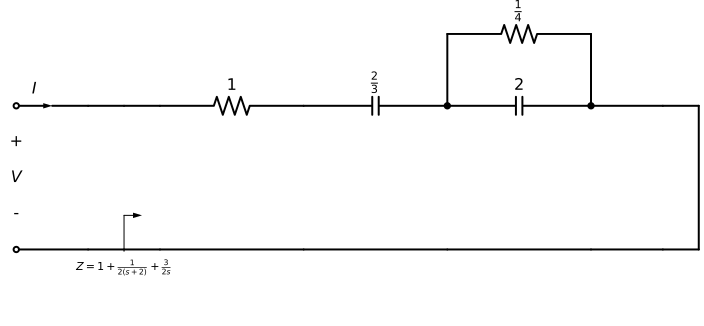

In [4]:
print_subtitle('Implementación circuital $Z_{RC}$ Foster serie')

# Tratamos a nuestra función imitancia como una Z
dibujar_foster_serie(k0 = k0, koo = koo, ki = ki_wi, kk = kk, z_exc = ZRC_foster)


In [5]:
# Se expande YRC a la Foster. Notar que se expande YRC/s, como si fuera ZRC. (Ver Kuo 331)
k0, koo, ki_wi, kk, YRC_foster = foster(YRC/s)

# Luego lo multiplicamos por s para obtener la YRC original.
k0, koo, ki_wi, kk, YRC_foster = foster_zRC2yRC(k0, koo, ki_wi, kk, YRC_foster)

print_subtitle('Expansión Foster de $Y_{RC}$ ')

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('Y_{RC}(s)', YRC)[1:-1], YRC_foster ))

print_latex(a_equal_b_latex_s('k_\infty', koo))

print_latex(a_equal_b_latex_s(r'k_1 = \left[ \frac{1}{ \frac{k_0}{s} +  k_k } \right]  = \
                                             \left[ \frac{1}{ \frac{1}{s. \frac{k_1}{\sigma_1}} + \frac{1}{k_1} } \right] = \
                                             \left[ k_0, k_k \right] = \
                                       \left[ \
                                             \left[ \frac{\sigma_i}{k_i}, \frac{1}{k_i} \right] \
                                       \right]', ki_wi ))


print_latex(a_equal_b_latex_s('k_k', kk))



#### Expansión Foster de $Y_{RC}$ 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Implementación circuital $Y_{RC}$ Foster serie

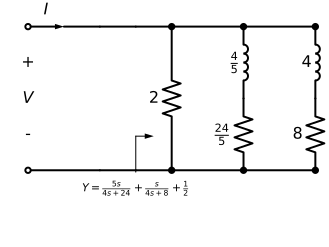

In [6]:
print_subtitle('Implementación circuital $Y_{RC}$ Foster serie')

# Recalculamos
k0, koo, ki_wi, kk, YRC_foster = foster(YRC/s)
k0, koo, ki_wi, kk, YRC_foster = foster_zRC2yRC(k0, koo, ki_wi, kk, YRC_foster)

# Tratamos a nuestra función imitancia como una Y
dibujar_foster_derivacion(k0, koo, ki_wi, kk, y_exc = YRC_foster)


### Implementación de  FE con inductores

Ahora presentamos las versiones equivalentes de las FE disipativas analizadas hasta ahora

#### Implementación circuital $Y_{RC}$ como $Z_{RL}$

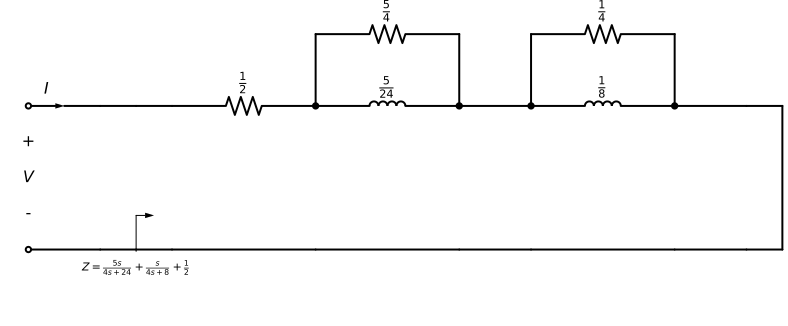

In [7]:
print_subtitle('Implementación circuital $Y_{RC}$ como $Z_{RL}$')

# Tratamos a nuestra función imitancia como una Y
dibujar_foster_serie(k0, koo, ki_wi, kk, z_exc = YRC_foster)


#### Implementación circuital $Z_{RC}$ como $Y_{RL}$

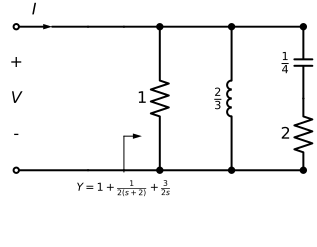

In [8]:
print_subtitle('Implementación circuital $Z_{RC}$ como $Y_{RL}$')

k0, koo, ki_wi, kk, ZRC_foster = foster(ZRC)

# Tratamos a nuestra función imitancia como una Y
dibujar_foster_derivacion(k0, koo, ki_wi, kk, y_exc = ZRC_foster)


### Expansión en fracciones continuas: Método de Cauer

Del mismo modo que el método de Foster se sustenta en la expansión en fracciones simples, el de Cauer consiste en la expansión en [fracciones continuas](https://en.wikipedia.org/wiki/Network_synthesis#Cauer_synthesis). En el caso de FE disipativas, se realizará la expansión mediante los residuos $k_0$, $k_\infty$ y $k_K$, dependiendo si se expande una $Z_{RC}$ o una $Y_{RC}$:

$$ Z_{RC}(s)= \frac{1}{s.C_1} + \frac{1}{ \frac{1}{R_1} + \frac{1}{ \frac{1}{s.C_2} + \cdots } } = 
         R_1 + \frac{1}{ s.C_1 + \frac{1}{ R_2 + \cdots } } $$

$$ Y_{RC}(s)= s.C_1 + \frac{1}{ R_1 + \frac{1}{ s.C_2 + \cdots } } = 
         \frac{1}{R_1} + \frac{1}{ s.C_1 + \frac{1}{ \frac{1}{R_2} + \cdots } } $$

se ve claramente como sendas funciones de inmitancia, se corresponden con 2 redes diferentes, dependiendo dónde se realicen las remociones. Se darán ejemplos en los siguientes paneles.



## Cauer 1: remociones en $\infty$

Se comienza con la primera forma del método, es decir cuando se realizan remociones de los residuos en infinito.

#### Implementación escalera de $Z_{RC}$ e $Y_{RL}$

<IPython.core.display.Math object>

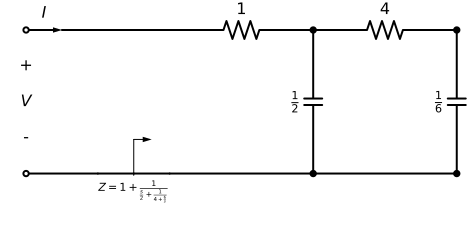

<IPython.core.display.Math object>

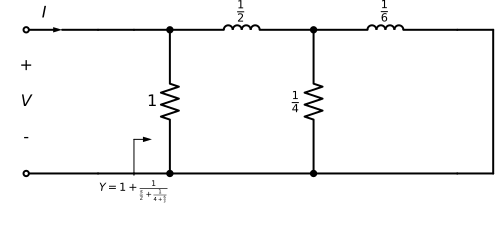

In [9]:
from pytc2.sintesis_dipolo import cauer_RC
from pytc2.dibujar import dibujar_cauer_RC_RL

# Implementaremos FF mediante Cauer 1 o remociones continuas en infinito
koo, ZRC_cauer_oo, rem = cauer_RC(ZRC, remover_en_inf=True)

print_subtitle('Implementación escalera de $Z_{RC}$ e $Y_{RL}$')

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('$ Z_{RC}(s)', ZRC)[1:-1], ZRC_cauer_oo ))

# Tratamos a nuestra función inmitancia como una Z
dibujar_cauer_RC_RL(koo, z_exc = ZRC_cauer_oo)

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('$ Y_{RL}(s)', ZRC)[1:-1], ZRC_cauer_oo ))

# Tratamos a nuestra función inmitancia como una Y
dibujar_cauer_RC_RL(koo, y_exc = ZRC_cauer_oo)



Se observa, como es de esperarse, que interpretar la inmitancia como impedancia o admitancia utilizando Cauer 1, da lugar a redes **duales**. Sin embargo en ambos casos se observan transferencias pasabajo (respecto a un posible puerto de salida en el extremo derecho de la red), ya que se obtienen inductores en serie y capacitores en derivación.

## Cauer 2: remociones en 0 o DC

Repetimos ahora para remociones de los residuos en 0 Hz, obtendremos dos redes también duales.

#### Implementación escalera de $Y_{RC}$ y $Z_{RL}$

<IPython.core.display.Math object>

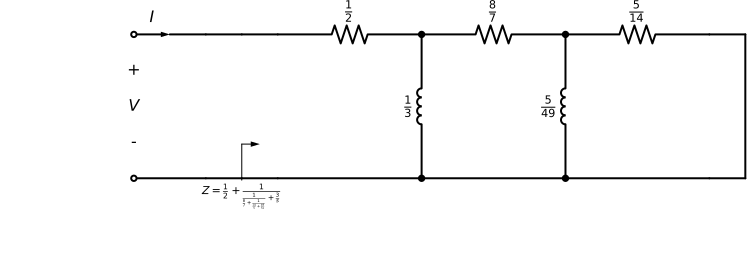

<IPython.core.display.Math object>

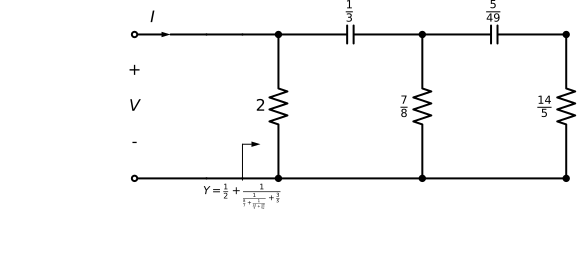

In [10]:

# Implementaremos FF mediante Cauer 1 o remociones continuas en infinito
koo, YRC_cauer_oo, rem = cauer_RC(YRC, remover_en_inf=False)

print_subtitle('Implementación escalera de $Y_{RC}$ y $Z_{RL}$')

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('$ Y_{RC}(s)', YRC)[1:-1], YRC_cauer_oo ))

# Tratamos a nuestra función inmitancia como una Z
dibujar_cauer_RC_RL(koo, z_exc = YRC_cauer_oo)

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('$ Z_{RL}(s)', YRC)[1:-1], YRC_cauer_oo ))

# Tratamos a nuestra función inmitancia como una Y
dibujar_cauer_RC_RL(koo, y_exc = YRC_cauer_oo)


Ambas redes duales, tienen características en común como ser que ambas tienen capacitores en serie e inductores en derivación. Esto contrasta con las redes halladas mediante Cauer 1, donde observamos lo contrario: inductores en serie y capacitores en derivación. Está claro que Cauer 1 da lugar a redes que, en caso **que imaginemos un puerto de salida en el extremo derecho de la red**, serían filtros **pasabajo**, mientras que sintetizar una red mediante Cauer 2 da lugar a una red escalera **pasa-altos**.
